In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
workouts2018 = pd.read_csv("workouts-2018.csv")
workouts2019 = pd.read_csv("workouts-2019.csv")
workouts2020 = pd.read_csv("workouts-2020.csv")
workouts2021 = pd.read_csv("workouts-2021.csv")
workouts2022 = pd.read_csv("workouts-2022.csv")
workouts2023 = pd.read_csv("workouts-2023.csv")

In [3]:
workouts2018.head()

,Title,WorkoutType,WorkoutDescription,PlannedDuration,PlannedDistanceInMeters,WorkoutDay,CoachComments,DistanceInMeters,PowerAverage,PowerMax,...,PWRZone3Minutes,PWRZone4Minutes,PWRZone5Minutes,PWRZone6Minutes,PWRZone7Minutes,PWRZone8Minutes,PWRZone9Minutes,PWRZone10Minutes,Rpe,Feeling
0,Rest Day,Day Off,There was some real intensity in your sessions...,NaN,NaN,2018-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rest Day,Day Off,Don’t be tempted to squeeze and additional ses...,NaN,NaN,2018-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10-Mile Time Trial or Under/Over Intervals,Bike,Time: 50 mins - 1 hr 10 mins Warm-up: http://b...,1.166667,NaN,2018-01-03,Develops aerobic endurance and builds power at...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rest Day,Day Off,If you have been short of time during this tra...,NaN,NaN,2018-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rest Day,Day Off,This is an important session. Don’t skip recov...,NaN,NaN,2018-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = pd.concat([workouts2018, workouts2019, 
                  workouts2020, workouts2021, 
                  workouts2022, workouts2023])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4154 entries, 0 to 1104
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    4104 non-null   object 
 1   WorkoutType              4154 non-null   object 
 2   WorkoutDescription       760 non-null    object 
 3   PlannedDuration          1631 non-null   float64
 4   PlannedDistanceInMeters  96 non-null     float64
 5   WorkoutDay               4154 non-null   object 
 6   CoachComments            288 non-null    object 
 7   DistanceInMeters         3847 non-null   float64
 8   PowerAverage             1849 non-null   float64
 9   PowerMax                 1849 non-null   float64
 10  Energy                   1824 non-null   float64
 11  AthleteComments          1496 non-null   object 
 12  TimeTotalInHours         3943 non-null   float64
 13  VelocityAverage          3847 non-null   float64
 14  VelocityMax              0 no

In [6]:
#drop columns that only have null values
data = data.drop(columns=['VelocityMax', 'CadenceMax', 'TorqueAverage',
                       'TorqueMax', 'HRZone8Minutes', 'HRZone9Minutes',
                       'HRZone10Minutes', 'PWRZone8Minutes',
                       'PWRZone9Minutes', 'PWRZone10Minutes'])

In [7]:
data.dtypes

Title                       object
WorkoutType                 object
WorkoutDescription          object
PlannedDuration            float64
PlannedDistanceInMeters    float64
WorkoutDay                  object
CoachComments               object
DistanceInMeters           float64
PowerAverage               float64
PowerMax                   float64
Energy                     float64
AthleteComments             object
TimeTotalInHours           float64
VelocityAverage            float64
CadenceAverage             float64
HeartRateAverage           float64
HeartRateMax               float64
IF                         float64
TSS                        float64
HRZone1Minutes             float64
HRZone2Minutes             float64
HRZone3Minutes             float64
HRZone4Minutes             float64
HRZone5Minutes             float64
HRZone6Minutes             float64
HRZone7Minutes             float64
PWRZone1Minutes            float64
PWRZone2Minutes            float64
PWRZone3Minutes     

In [8]:
data['WorkoutDay'] = pd.to_datetime(data['WorkoutDay'])

In [9]:
data['WorkoutDay'].head()

0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
Name: WorkoutDay, dtype: datetime64[ns]

In [10]:
data['WorkoutType'].unique()

array(['Day Off', 'Bike', 'Walk', 'Run', 'Strength', 'Swim', 'Other',
       'MTB', 'Custom', 'X-Train'], dtype=object)

In [11]:
#import to SQLLite to practice SQL queries
import sqlite3
conn = sqlite3.connect('cyclingdata.db')

data.to_sql('data', conn, if_exists='replace', index=False)

4154

In [12]:
query = """
    SELECT Title, WorkoutType, WorkoutDescription, PlannedDuration, WorkoutDay, TimeTotalinHours, RPE, IF, TSS 
    FROM data
    WHERE TimeTotalinHours > 0
        AND WorkoutDescription != 'None'
        AND TSS != "NaN"
        AND Rpe != "NaN"
        AND WorkoutType = 'Bike'OR WorkoutType = 'MTB'
    """

result = pd.read_sql_query(query, conn)
result.head(10)

,Title,WorkoutType,WorkoutDescription,PlannedDuration,WorkoutDay,TimeTotalInHours,Rpe,IF,TSS
0,First intervals of the year! =D,Bike,Duration: 75 minutes Course: Flat or rolling h...,1.250000,2019-02-05T00:00:00,1.254444,8.0,0.867945,94.09
1,Zwift - Feb 5 & 7 Intervals,Bike,Duration: 75 minutes Course: Flat or rolling h...,1.250000,2019-02-07T00:00:00,1.263611,7.0,0.866481,94.12
2,Zwift - VoxTour Stage 3: Hannah Walker (E),Bike,Duration: 90-120 minutes Course: Flat or rolli...,2.000000,2019-02-09T00:00:00,2.005278,5.0,0.712023,101.20
3,Cycling,Bike,Duration: 90-120 minutes Course: Flat or rolli...,1.500000,2019-02-10T00:00:00,1.325833,4.0,0.833616,102.79
4,1.5 Hour Ride,Bike,Duration: 90-120 minutes Course: Flat or rolli...,2.000000,2019-02-16T00:00:00,2.108056,5.0,0.656301,102.48
5,2 Hour Ride,Bike,Duration: 90-120 minutes Course: Flat or rolli...,1.500000,2019-02-18T00:00:00,1.325556,6.0,0.793293,93.06
6,Tuesday Intervals,Bike,Duration: 75 minutes Course: Flat or rolling h...,1.262467,2019-02-19T00:00:00,1.255833,8.0,0.900267,101.36
7,"""Funtervals""",Bike,Duration: 70 minutes Course: Flat or rolling h...,1.134722,2019-02-21T00:00:00,1.136667,10.0,1.011034,115.17
8,Saturday Morning Pain Session,Bike,Duration: 75 minutes Course: Flat or rolling h...,1.200000,2019-02-23T00:00:00,1.203333,8.0,0.905888,98.21
9,2 Hour Ride,Bike,Duration: 2 to 2.5 hours Course: Rolling hills...,1.500000,2019-02-24T00:00:00,1.401944,6.0,0.780160,84.97


/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


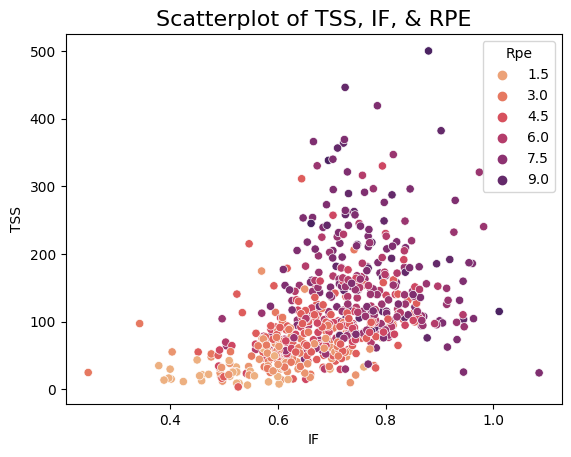

In [13]:
sns.scatterplot(data=result, x='IF', y='TSS', hue='Rpe', palette='flare')
plt.title('Scatterplot of TSS, IF, & RPE', fontsize=16)
plt.show()

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


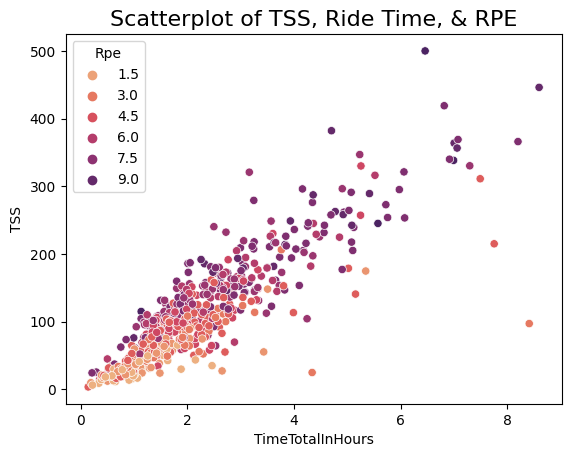

In [14]:
sns.scatterplot(data=result, x='TimeTotalInHours', y='TSS', hue='Rpe', palette='flare')
plt.title('Scatterplot of TSS, Ride Time, & RPE', fontsize=16)
plt.show()

In [15]:
numeric_df = result.drop(columns=result.select_dtypes(exclude=['number']).columns)

numeric_df.corr()

,PlannedDuration,TimeTotalInHours,Rpe,IF,TSS
PlannedDuration,1.000000,0.764733,0.433076,0.117775,0.707608
TimeTotalInHours,0.764733,1.000000,0.438718,0.306785,0.903844
Rpe,0.433076,0.438718,1.000000,0.582565,0.625136
IF,0.117775,0.306785,0.582565,1.000000,0.571928
TSS,0.707608,0.903844,0.625136,0.571928,1.000000


In [61]:
query = """
    SELECT *
    FROM data
    WHERE TimeTotalinHours > 0
        AND WorkoutDescription != 'None'
        AND TSS <> 'NaN'
        AND RPE <> 'NaN'
        AND Feeling <> 'NaN'
        AND WorkoutType = 'Bike'OR WorkoutType = 'MTB'
    """

result2 = pd.read_sql_query(query, conn)
result2.head()

,Title,WorkoutType,WorkoutDescription,PlannedDuration,PlannedDistanceInMeters,WorkoutDay,CoachComments,DistanceInMeters,PowerAverage,PowerMax,...,HRZone7Minutes,PWRZone1Minutes,PWRZone2Minutes,PWRZone3Minutes,PWRZone4Minutes,PWRZone5Minutes,PWRZone6Minutes,PWRZone7Minutes,Rpe,Feeling
0,First intervals of the year! =D,Bike,Duration: 75 minutes Course: Flat or rolling h...,1.25,NaN,2019-02-05T00:00:00,None,32188.740234,169.0,274.0,...,0.0,17.0,22.0,13.0,0.0,24.0,0.0,NaN,8.0,5.0
1,Zwift - Feb 5 & 7 Intervals,Bike,Duration: 75 minutes Course: Flat or rolling h...,1.25,NaN,2019-02-07T00:00:00,None,26779.939453,168.0,238.0,...,0.0,18.0,21.0,13.0,0.0,24.0,0.0,NaN,7.0,3.0
2,Zwift - VoxTour Stage 3: Hannah Walker (E),Bike,Duration: 90-120 minutes Course: Flat or rolli...,2.00,NaN,2019-02-09T00:00:00,None,59809.238281,149.0,390.0,...,0.0,15.0,76.0,29.0,3.0,1.0,0.0,NaN,5.0,3.0
3,Cycling,Bike,Duration: 90-120 minutes Course: Flat or rolli...,1.50,NaN,2019-02-10T00:00:00,None,16836.869141,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0
4,1.5 Hour Ride,Bike,Duration: 90-120 minutes Course: Flat or rolli...,2.00,NaN,2019-02-16T00:00:00,None,44226.210938,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0


/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


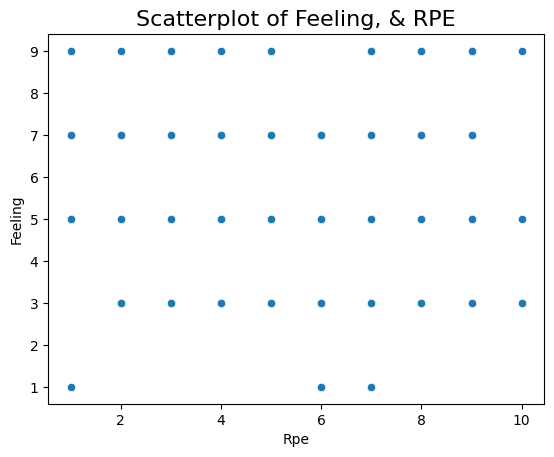

In [62]:
sns.scatterplot(data=result2, x='Rpe', y='Feeling')
plt.title('Scatterplot of Feeling, & RPE', fontsize=16)
plt.show()

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


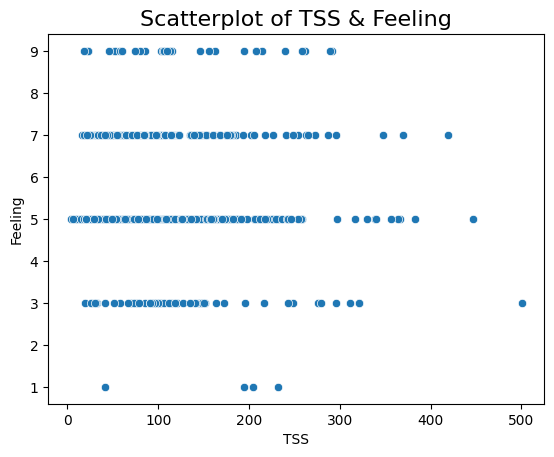

In [63]:
sns.scatterplot(data=result2, x='TSS', y='Feeling')
plt.title('Scatterplot of TSS & Feeling', fontsize=16)
plt.show()

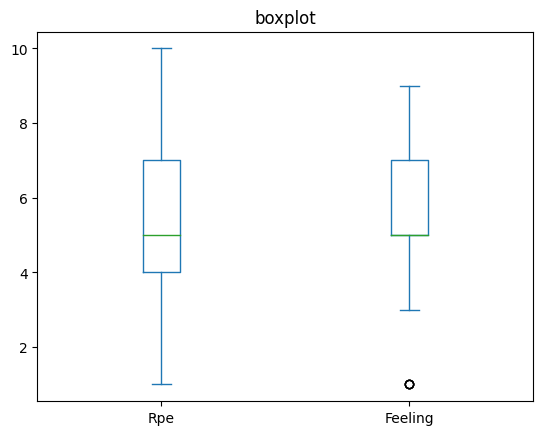

In [64]:
ax = result2[['Rpe', 'Feeling']].plot(kind='box', title='boxplot')
plt.show()

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='TSS'>

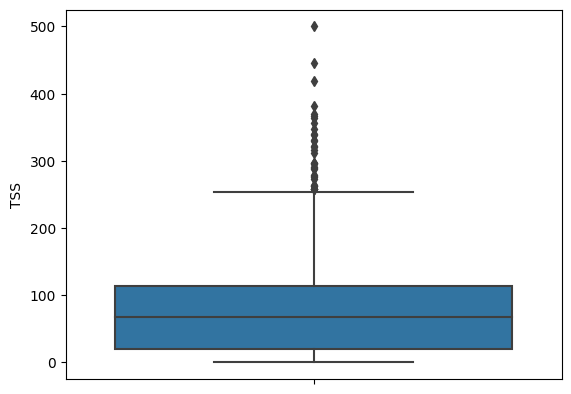

In [65]:
sns.boxplot(data=result2, y='TSS')

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


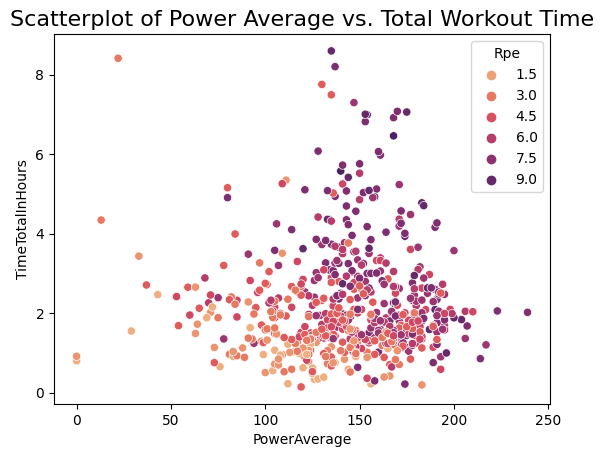

In [66]:
sns.scatterplot(data=result2, x='PowerAverage', y='TimeTotalInHours', hue='Rpe', palette='flare')
plt.title('Scatterplot of Power Average vs. Total Workout Time', fontsize=16)
plt.show()

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='PowerAverage'>

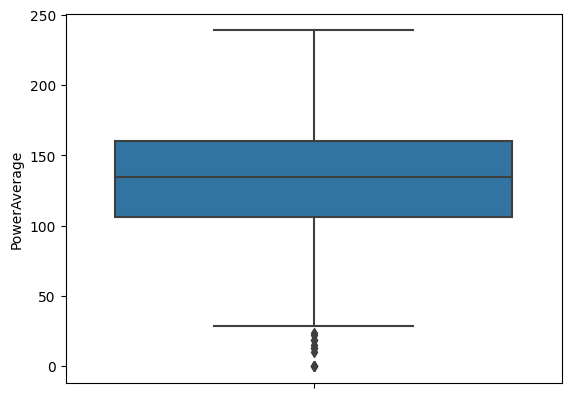

In [67]:
sns.boxplot(data=result2, y='PowerAverage')

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='TimeTotalInHours'>

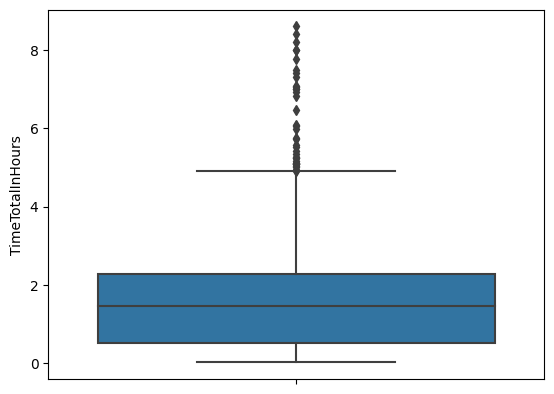

In [68]:
sns.boxplot(data=result2, y='TimeTotalInHours')

## How does the subjective 'RPE' metric correlate to power and heart rate?

### Does RPE increase linearly w/ average HR or Power output?

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


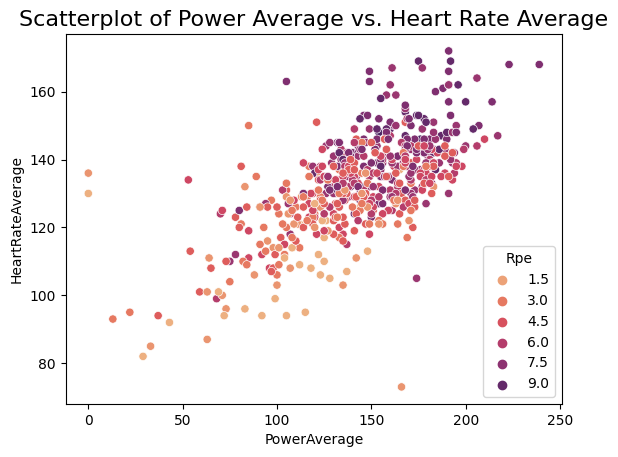

In [69]:
sns.scatterplot(data=result2, x='PowerAverage', y='HeartRateAverage', hue='Rpe', palette='flare')
plt.title('Scatterplot of Power Average vs. Heart Rate Average', fontsize=16)
plt.show()

Based on the above scatterplot, it does appear that as both average power and average heart rate increase, RPE increases. 

## Can we predict RPE based on duration, avg PWR, HR?

In [70]:
result2.Rpe.describe()

count    628.000000
mean       5.253185
std        2.294416
min        1.000000
25%        4.000000
50%        5.000000
75%        7.000000
max       10.000000
Name: Rpe, dtype: float64

In [71]:
result2.describe()

,PlannedDuration,PlannedDistanceInMeters,DistanceInMeters,PowerAverage,PowerMax,Energy,TimeTotalInHours,VelocityAverage,CadenceAverage,HeartRateAverage,...,HRZone7Minutes,PWRZone1Minutes,PWRZone2Minutes,PWRZone3Minutes,PWRZone4Minutes,PWRZone5Minutes,PWRZone6Minutes,PWRZone7Minutes,Rpe,Feeling
count,599.000000,45.0,1011.000000,892.000000,892.000000,888.000000,1015.000000,1011.000000,900.000000,888.000000,...,673.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,320.000000,628.000000,620.000000
mean,1.982015,0.0,25213.197613,131.110987,587.308296,842.295259,1.670513,4.349679,74.573333,128.311937,...,1.536404,54.194820,18.845721,12.054054,7.703829,4.476351,4.309685,1.912500,5.253185,5.393548
std,1.091855,0.0,24115.943166,39.124567,236.035584,777.430173,1.417433,1.625245,12.345966,16.231367,...,7.247265,48.151716,21.915330,14.032391,8.885156,5.416321,5.298299,2.606689,2.294416,1.378331
min,0.333333,0.0,0.000000,0.000000,0.000000,1.807000,0.027593,0.000000,0.000000,73.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.416667,0.0,7224.285156,106.000000,441.500000,229.622250,0.531354,3.325500,70.000000,119.000000,...,0.000000,18.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,1.500000,0.0,20301.810547,135.000000,593.500000,689.969000,1.470923,4.199000,75.000000,130.000000,...,0.000000,44.000000,13.000000,8.000000,5.000000,3.000000,3.000000,1.000000,5.000000,5.000000
75%,2.500000,0.0,33675.865234,160.000000,699.250000,1156.944250,2.280475,5.254000,80.000000,139.000000,...,0.000000,76.000000,24.000000,16.000000,11.000000,7.000000,6.000000,2.250000,7.000000,7.000000
max,6.000000,0.0,163372.796875,239.000000,3209.000000,4427.438000,8.594491,10.745000,251.000000,172.000000,...,118.000000,484.000000,152.000000,107.000000,62.000000,45.000000,44.000000,18.000000,10.000000,9.000000


In [72]:
result3 = result2[['PowerAverage', 'HeartRateAverage', 'TimeTotalInHours', 'Rpe']]

In [73]:
result3.describe()

,PowerAverage,HeartRateAverage,TimeTotalInHours,Rpe
count,892.000000,888.000000,1015.000000,628.000000
mean,131.110987,128.311937,1.670513,5.253185
std,39.124567,16.231367,1.417433,2.294416
min,0.000000,73.000000,0.027593,1.000000
25%,106.000000,119.000000,0.531354,4.000000
50%,135.000000,130.000000,1.470923,5.000000
75%,160.000000,139.000000,2.280475,7.000000
max,239.000000,172.000000,8.594491,10.000000


In [74]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9], ordered=True)

result3["Rpe"] = result3["Rpe"].astype(cat_type)

/var/folders/1p/n1yg43r91032z6dwjfvfltz00000gn/T/ipykernel_44300/3606035101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result3["Rpe"] = result3["Rpe"].astype(cat_type)


In [75]:
result3.isnull().sum()

PowerAverage        136
HeartRateAverage    140
TimeTotalInHours     13
Rpe                 404
dtype: int64

In [76]:
#delete NA
result3.dropna(axis=0, inplace=True)

/var/folders/1p/n1yg43r91032z6dwjfvfltz00000gn/T/ipykernel_44300/3262627439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result3.dropna(axis=0, inplace=True)


In [77]:
result3.Rpe.describe()

count     555
unique      9
top         8
freq       90
Name: Rpe, dtype: int64

Text(0.5, 1.0, 'Distribution by RPE')

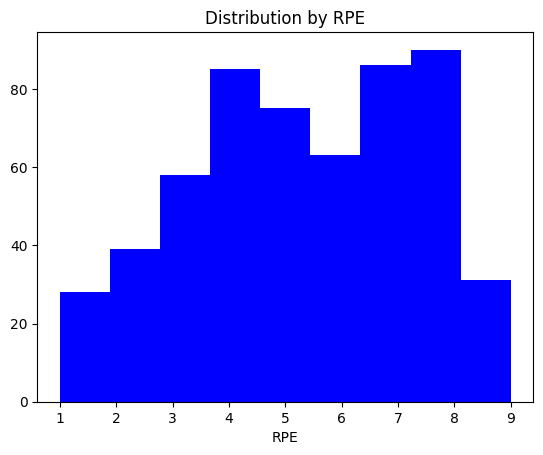

In [78]:
plt.hist(result3['Rpe'],bins=9,color='b')
plt.xlabel('RPE')
plt.title('Distribution by RPE')

In [79]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

y = result3['Rpe']
X = result3[['PowerAverage', 'HeartRateAverage']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

mod_probe = OrderedModel(y_train, X_train, distr='logit')
res_log = mod_probe.fit(method='bfgs')

predicted = res_log.model.predict(res_log.params, np.array(X_test))
preds = [np.argmax(x) for x in predicted]

res_log.summary()

Optimization terminated successfully.
         Current function value: 1.897649
         Iterations: 49
         Function evaluations: 54
         Gradient evaluations: 54


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    Rpe   Log-Likelihood:                -631.92
Model:                   OrderedModel   AIC:                             1284.
Method:            Maximum Likelihood   BIC:                             1322.
Date:                Thu, 07 Mar 2024                                         
Time:                        10:45:33                                         
No. Observations:                 333                                         
Df Residuals:                     323                                         
Df Model:                           2                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
PowerAverage         0.0057      0.004      1.603      0.109      -0.001       0.013
HeartRateAverage     0.0804      0.010      8.231      0.000       0.061       0.100
1/2                  7.6266      1.058      7.210      0.000       5.553       9.700
2/3                  0.1841      0.208      0.887      0.375      -0.223       0.591
3/4                  0.1136      0.152      0.750      0.454      -0.183       0.411
4/5                 -0.0021      0.126     -0.016      0.987      -0.250       0.246
5/6                 -0.3550      0.141     -2.511      0.012      -0.632      -0.078
6/7                 -0.5396      0.158     -3.424      0.001      -0.849      -0.231
7/8                 -0.1643      0.138     -1.194      0.233      -0.434       0.105
8/9                  0.6692      0.125      5.343      0.000       0.424       0.915
====================================================================================
"""

In [80]:
from sklearn import metrics

metrics.accuracy_score(y_test, preds)

0.20270270270270271

In [81]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

y = result3['Rpe']
X = result3[['PowerAverage', 'HeartRateAverage', 'TimeTotalInHours']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

mod_probe = OrderedModel(y_train, X_train, distr='logit')
res_log = mod_probe.fit(method='bfgs')

predicted = res_log.model.predict(res_log.params, np.array(X_test))
preds = [np.argmax(x) for x in predicted]

res_log.summary()

Optimization terminated successfully.
         Current function value: 1.758149
         Iterations: 52
         Function evaluations: 57
         Gradient evaluations: 57


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    Rpe   Log-Likelihood:                -585.46
Model:                   OrderedModel   AIC:                             1193.
Method:            Maximum Likelihood   BIC:                             1235.
Date:                Thu, 07 Mar 2024                                         
Time:                        10:45:35                                         
No. Observations:                 333                                         
Df Residuals:                     322                                         
Df Model:                           3                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
PowerAverage         0.0121      0.004      3.406      0.001       0.005       0.019
HeartRateAverage     0.0804      0.010      8.159      0.000       0.061       0.100
TimeTotalInHours     0.7723      0.089      8.695      0.000       0.598       0.946
1/2                  9.6937      1.112      8.720      0.000       7.515      11.873
2/3                  0.3037      0.201      1.513      0.130      -0.090       0.697
3/4                  0.2585      0.147      1.754      0.079      -0.030       0.547
4/5                  0.1522      0.125      1.218      0.223      -0.093       0.397
5/6                 -0.1903      0.141     -1.353      0.176      -0.466       0.085
6/7                 -0.3715      0.157     -2.366      0.018      -0.679      -0.064
7/8                  0.0148      0.137      0.108      0.914      -0.253       0.283
8/9                  0.8158      0.123      6.648      0.000       0.575       1.056
====================================================================================
"""

In [82]:
from sklearn import metrics

metrics.accuracy_score(y_test, preds)

0.2072072072072072

Because RPE is an ordered categorical variable, I used the ordinal model feature to do a multinomial logistic regression of sorts, where first, just average power and average heart rate were used to predict RPE, and then, with a second model, added the total ride time. 

Though the accuracy metrics of both models are equally poor, the Log-Likelihood of the model with the total ride time is less, indicating some improvement in the model. 

In [83]:
#more basic regression model

import statsmodels.api as sm

X = result3[['PowerAverage', 'HeartRateAverage', 'TimeTotalInHours']]
y = result3['Rpe']

# Add constant to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Rpe   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     227.9
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           4.01e-96
Time:                        10:45:36   Log-Likelihood:                -1008.5
No. Observations:                 555   AIC:                             2025.
Df Residuals:                     551   BIC:                             2042.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -7.5271      0.612  

Here, the R-squared (and Adjusted R-squared) are close to .55, which indicate that 55% of the variability in RPE can be explained by workout length, average heart rate, and average power. 

The F-statistic is 227.9 with a low p-value, which would indicate that the model as a whole is statistically significant. 

When controlling for time and heart rate, power average is statistically significant and positively correlated with RPE. Heart Rate, and Total Time, however are not statistically significant when controlling for the other variables. 

## Do workouts with average power/ heart rate over tempo consistently have higher rpe?

In [86]:
# Create binary variables for average heart rate over 150 and average power over 220 (low marker of tempo ranges currently; assumption being that this is consistent over time)
result3['heart_rate_over_150'] = (result3['HeartRateAverage'] > 150).astype(int)
result3['power_over_220'] = (result3['PowerAverage'] > 220).astype(int)

# Create the regression model
X = result3[['heart_rate_over_150', 'power_over_220', 'TimeTotalInHours']]
y = result3['Rpe']

# Add constant to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Rpe   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     61.82
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           1.83e-34
Time:                        10:50:18   Log-Likelihood:                -1151.9
No. Observations:                 555   AIC:                             2312.
Df Residuals:                     551   BIC:                             2329.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.7462    

/var/folders/1p/n1yg43r91032z6dwjfvfltz00000gn/T/ipykernel_44300/2411831300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result3['heart_rate_over_150'] = (result3['HeartRateAverage'] > 150).astype(int)
/var/folders/1p/n1yg43r91032z6dwjfvfltz00000gn/T/ipykernel_44300/2411831300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result3['power_over_220'] = (result3['PowerAverage'] > 220).astype(int)


Interestingly, this model has a lower R2 and explains only 25% of the variance in Rpe. It also has no statistically significant variables. 

In [87]:
result3['power_over_220'].value_counts()

power_over_220
0    553
1      2
Name: count, dtype: int64

In [88]:
result3['heart_rate_over_150'].value_counts()

heart_rate_over_150
0    513
1     42
Name: count, dtype: int64

Again, we have a small data problem...perhaps repeat with 'endurance' ranges?

In [90]:
# Create binary variables for average heart rate over 150 and average power over 220 (low marker of tempo ranges currently; assumption being that this is consistent over time)
result3['heart_rate_over_140'] = (result3['HeartRateAverage'] > 140).astype(int)
result3['power_over_160'] = (result3['PowerAverage'] > 160).astype(int)

# Create the regression model
X = result3[['heart_rate_over_140', 'power_over_160', 'TimeTotalInHours']]
y = result3['Rpe']

# Add constant to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Rpe   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     122.2
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           1.10e-60
Time:                        10:53:25   Log-Likelihood:                -1090.8
No. Observations:                 555   AIC:                             2190.
Df Residuals:                     551   BIC:                             2207.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   3.0769    

/var/folders/1p/n1yg43r91032z6dwjfvfltz00000gn/T/ipykernel_44300/4050507655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result3['heart_rate_over_140'] = (result3['HeartRateAverage'] > 140).astype(int)
/var/folders/1p/n1yg43r91032z6dwjfvfltz00000gn/T/ipykernel_44300/4050507655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result3['power_over_160'] = (result3['PowerAverage'] > 160).astype(int)


In [91]:
result3['power_over_160'].value_counts()

power_over_160
0    368
1    187
Name: count, dtype: int64

In [92]:
result3['heart_rate_over_140'].value_counts()

heart_rate_over_140
0    399
1    156
Name: count, dtype: int64

Better data balance, but no statistically significant results. 

## Are workouts following rest days consistently higher or lower rpe? (Control for intensity using tss?)

In [39]:
query = """
    SELECT Title, WorkoutType, WorkoutDescription, PlannedDuration, WorkoutDay, TimeTotalinHours, RPE, IF, TSS 
    FROM data
    WHERE WorkoutType = 'Bike'OR WorkoutType = 'MTB' OR WorkoutType = 'Day Off'
    """

result4 = pd.read_sql_query(query, conn)
result4.head(10)

,Title,WorkoutType,WorkoutDescription,PlannedDuration,WorkoutDay,TimeTotalInHours,Rpe,IF,TSS
0,Rest Day,Day Off,There was some real intensity in your sessions...,NaN,2018-01-01T00:00:00,NaN,NaN,NaN,NaN
1,Rest Day,Day Off,Don’t be tempted to squeeze and additional ses...,NaN,2018-01-02T00:00:00,NaN,NaN,NaN,NaN
2,10-Mile Time Trial or Under/Over Intervals,Bike,Time: 50 mins - 1 hr 10 mins Warm-up: http://b...,1.166667,2018-01-03T00:00:00,NaN,NaN,NaN,NaN
3,Rest Day,Day Off,If you have been short of time during this tra...,NaN,2018-01-04T00:00:00,NaN,NaN,NaN,NaN
4,Rest Day,Day Off,This is an important session. Don’t skip recov...,NaN,2018-01-05T00:00:00,NaN,NaN,NaN,NaN
5,Recovery ride,Bike,Warm-up: Ease yourself gently into today’s ses...,2.000000,2018-01-06T00:00:00,NaN,NaN,NaN,NaN
6,None,Bike,Time: 2 hr 30 mins - 3 hrs Warm-up: WU R from ...,3.000000,2018-01-07T00:00:00,NaN,NaN,NaN,NaN
7,Cycling,Bike,None,NaN,2018-02-14T00:00:00,0.699770,NaN,0.922709,66.26
8,Cycling,Bike,None,NaN,2018-02-25T00:00:00,0.048396,NaN,NaN,NaN
9,Cycling,Bike,None,NaN,2018-02-26T00:00:00,4.124119,NaN,0.802961,305.23


In [43]:
result4['follows_rest_day'] = (result4['WorkoutType'].shift(1) == 'Day Off').astype(int)

In [50]:
#drop if RPE == NaN
result4 = result4.dropna(subset=['Rpe'])

#drop if TSS == NaN
result4 = result4.dropna(subset=['TSS'])

In [51]:
import statsmodels.api as sm

#regression model to predict 'rpe' based on 'follows_rest_day' and 'tss'
X = result4[['follows_rest_day', 'TSS']]
y = result4['Rpe']

#add constant to the model
X = sm.add_constant(X)

#fit the regression model
model = sm.OLS(y, X).fit()

#print summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Rpe   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     249.5
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           6.97e-91
Time:                        10:23:57   Log-Likelihood:                -2409.7
No. Observations:                1166   AIC:                             4825.
Df Residuals:                    1163   BIC:                             4841.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.6459      0.097  

The F-statistisc of 249.4 with a low p-value indicates that the model as a whole is statistically significant. With an R-squared (and Adjusted R-squared) of .3, we can say that approximately 30% of the variability in RPE can be explained by the variables in the model. 

More specifically, the coefficient of 'follows_rest_day' has a p-value close to .5, which is not statistically significant, indicating that when controlling for TSS, that whether a workout follows a rest day or not is not a significant indicator of RPE. On the other hand, TSS, when controlling for 'follows_rest_day', does seem to be positively correlated with 'Rpe.'

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


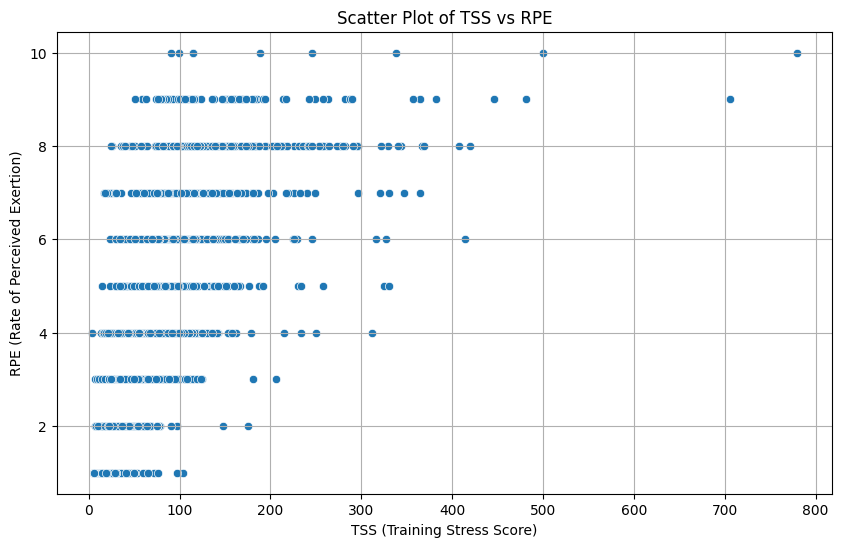

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


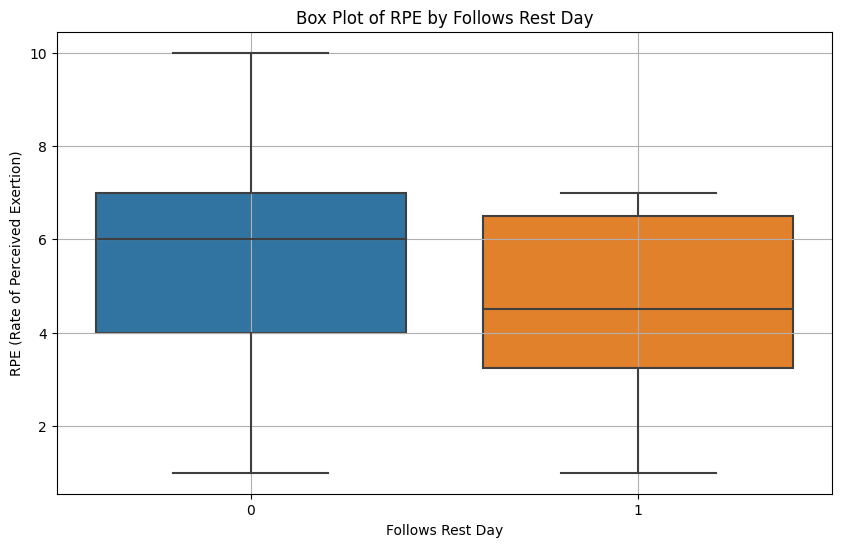

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


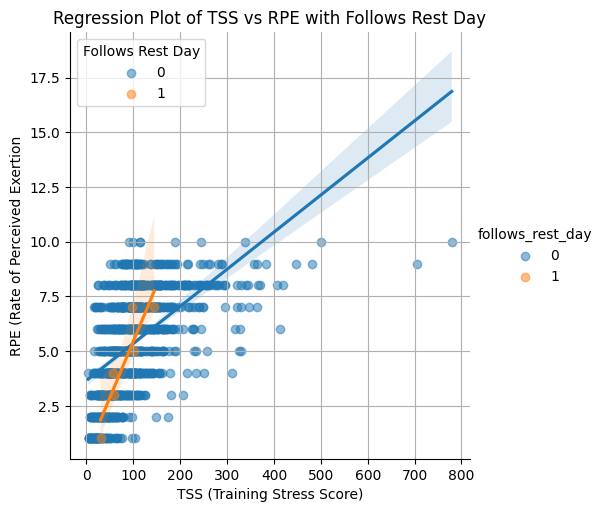

In [56]:
# Scatter plot of 'TSS' vs. 'Rpe'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TSS', y='Rpe', data=result4)
plt.title('Scatter Plot of TSS vs RPE')
plt.xlabel('TSS (Training Stress Score)')
plt.ylabel('RPE (Rate of Perceived Exertion)')
plt.grid(True)
plt.show()

# Box plot of 'Rpe' grouped by 'follows_rest_day'
plt.figure(figsize=(10, 6))
sns.boxplot(x='follows_rest_day', y='Rpe', data=result4)
plt.title('Box Plot of RPE by Follows Rest Day')
plt.xlabel('Follows Rest Day')
plt.ylabel('RPE (Rate of Perceived Exertion)')
plt.grid(True)
plt.show()

# Regression plot of 'TSS' vs. 'Rpe' with hue='follows_rest_day'
sns.lmplot(x='TSS', y='Rpe', data=result4, hue='follows_rest_day', scatter_kws={'alpha':0.5})
plt.title('Regression Plot of TSS vs RPE with Follows Rest Day')
plt.xlabel('TSS (Training Stress Score)')
plt.ylabel('RPE (Rate of Perceived Exertion')
plt.grid(True)
plt.legend(title='Follows Rest Day', loc='upper left')
plt.show()

In [ ]:
#1 in 'follows rest day' indcates yes, it follows a rest day

In [59]:
result4['follows_rest_day'].value_counts()

follows_rest_day
0    1160
1       6
Name: count, dtype: int64

We have a small data problem here... which makes the model unreliable, as only 6 efforts that have both TSS and RPE ratings 'follow a rest day.'